# Homework 11

The block below imports the necessary packages.

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns

In this assignment, you will work with the perovskite dataset and MNIST dataset. Both datasets are provided below.

In [2]:
# Perovskite Dataset
perov = pd.read_csv('perovskite_data.csv')

# MNIST Dataset
from sklearn.datasets import load_digits

digits = load_digits()

X_mnist = np.array(digits.data)
y_mnist = np.array(digits.target)

## 1. One-hot Encoding

In this problem, you will play with the perovskite dataset.

### 1a: One-hot encoded features

Use the `X` column of the perovskite dataset (corresponding to the identity of the X ion in the $\mathrm{ABX_3}$ coumpound) and create a matrix of one-hot encoded features from `X`. Show the first 10 rows of the matrix.

In [3]:
X_onehot = pd.get_dummies(perov['X'])
X_onehot.head(10)

,Br,Cl,F,I,O
0,0,0,0,0,1
1,0,0,0,0,1
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,0,0,1
5,0,0,1,0,0
6,0,0,1,0,0
7,0,1,0,0,0
8,0,0,1,0,0
9,0,0,1,0,0


### 1b: Analyzing X ions

Print the sum over all rows for each feature.

In [4]:
print(X_onehot.sum(axis = 0))

Br     27
Cl     71
F      66
I      43
O     369
dtype: int64


Briefly describe how to interpret the result of the sum over all rows.

**Answer**

The sum over all rows will be the number of composites that contain the element as `X` in $\mathrm{ABX_3}$ formula.

### 1c: One-hot encoding and categorical variables

Consider a dataset consisting of a single categorical variable with a total of **N** datapoints and corresponding outputs, $y$. Assume that each datapoint has a unique category label such that there are **N** distinct categories. You apply one-hot encoding to create a new feature matrix $\bar{\bar{X}}$ and decide to fit a linear regression model:

$\vec{y}=\bar{\bar{X}}\vec{w}$

What will the optimal values of $\vec{w}$ be and the $\mathrm{r^2}$ be? You can use code, math, or a conceptual explanation to answer this question.

**Answer**

The optimal values of $\vec{w}$ will be $\vec{y}$. Applying one-hot encoding to **N** distinct categories with **N** datapoints will result in an **N x N** identity matrix in which case $\vec{w}$ will be identical to $\vec{y}$.

## 2. PCA vs. LDA

In this problem, you will play with the MNIST dataset. You will compare the performance of LDA with PCA by visualizing classfication results as a confustion matrix. You may find the `assign_labels` function from the Skill Check very useful for the following problems.

### 2a: PCA

Show a confusion matrix after going through the following steps:

- Apply PCA to the MNIST dataset and reduce the dimensionality to 9.
- Apply k-means clustering to the PCA transformed data with `n_clusters=10`.
- Assign a label to each cluster by using the most common label from the cluster.
- Create a confusion matrix that compares the original label vs. assigned label

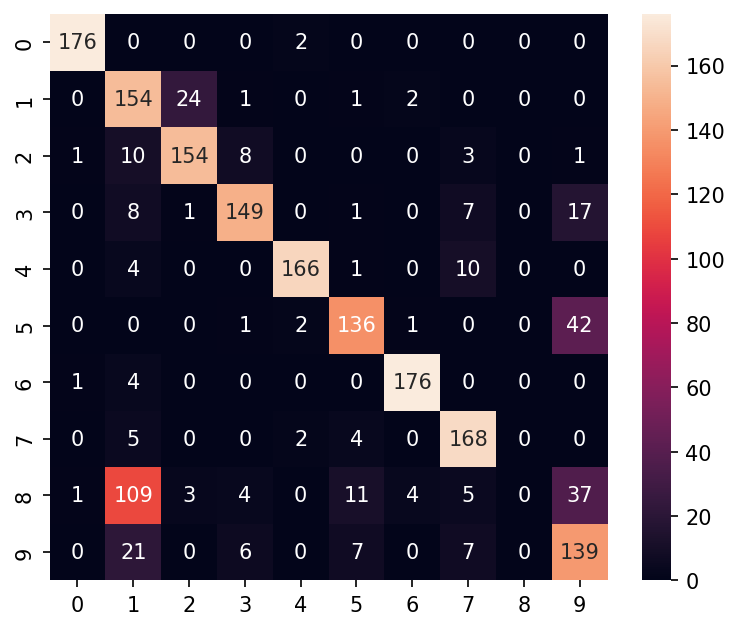

In [5]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components = 9)
X_pca = pca.fit_transform(X_mnist)

kmeans = KMeans(n_clusters = 10)
y_pca = kmeans.fit_predict(X_pca)

y_predict_pca = np.zeros(y_mnist.shape)

for i in range(10):
    collect_label = y_mnist[y_pca == i]
    count_label = np.bincount(collect_label)
    common_label = np.argmax(count_label)
    
    y_predict_pca[y_pca == i] = common_label
    
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_mnist, y_predict_pca)
fig, ax = plt.subplots(figsize = (6, 5), dpi = 150)
sns.heatmap(cm, annot = True, fmt = 'd', ax = ax);

### 2b: LDA

Show a confusion matrix by following the same steps above using LDA instead of PCA.

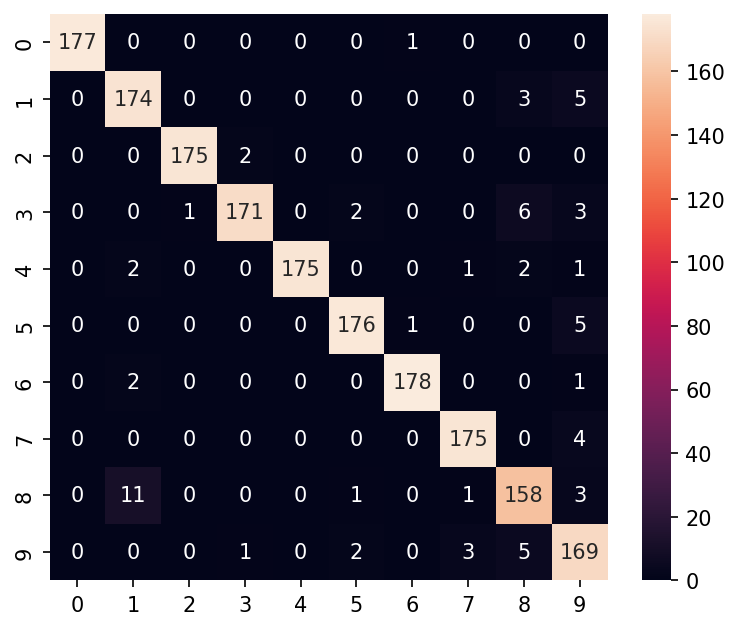

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_mnist, y_mnist)
X_lda = lda.transform(X_mnist)

kmeans = KMeans(n_clusters = 10)
y_lda = kmeans.fit_predict(X_lda)

y_predict_lda = np.zeros(y_mnist.shape)

for i in range(10):
    collect_label = y_mnist[y_lda == i]
    count_label = np.bincount(collect_label)
    common_label = np.argmax(count_label)
    
    y_predict_lda[y_lda == i] = common_label
    
fig, ax = plt.subplots(figsize = (6, 5), dpi = 150)
cm = confusion_matrix(y_mnist, y_predict_lda)
sns.heatmap(cm, annot = True, fmt = 'd', ax = ax);

### 2c: Discussion

Briefly discuss the results.

**Answer**

Clustering performs much better for the LDA-projected data as compared to the PCA-projected data. The PCA-projected data struggles identifying **1** and **9** and there are much less mispredictions for the LDA-projected data.